## BANK MARKETING: 
Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

#### Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. 
After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. 
Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher 
gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into
buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would 
like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on 
such clients.


#### Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a 
cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount 
of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing,
advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most 
effective way to reach out to people. However, they require huge investment as large call centers are hired to actually 
execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they 
can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc.
Along with the client data, you are also provided with the information of the call such as the duration of the call, 
day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term 
deposit.


#### About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
The classification goal of this dataset is to predict if the client or the customer of polish banking institution will 
subscribe a term deposit product of the bank or not. 
**** You are provided with following 2 files:****
    
1.train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the
target variable “subscribed”. You have to train your model using this file.

2.test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


#### Output variable (desired target):

- Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [1]:
# Importing Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data set both 
train_data = pd.read_csv('termdeposit_train.csv')
test_data  = pd.read_csv('termdeposit_test.csv')

In [3]:
# Checking data sets 
train_data.head(2)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no


In [4]:
test_data.head(2)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown


In [5]:
test_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [6]:
len(train_data.columns)

18

In [7]:
len(test_data.columns)

17

Hence, 'Subscribed' is the target variable.

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [10]:
train_data.shape

(31647, 18)

In [11]:
test_data.shape

(13564, 17)

In [12]:
# Checking Missing values in train_data
train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [13]:
#Checking the Missing value in test_data 
test_data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

#### Data Visualization 

In [14]:
# checking value count of Job entity
train_data['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<Axes: xlabel='job', ylabel='Count'>

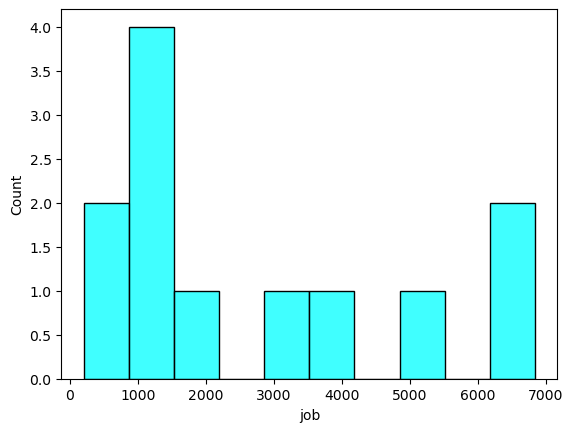

In [15]:
sns.histplot(train_data['job'].value_counts(),bins=10, color='cyan')

<Axes: >

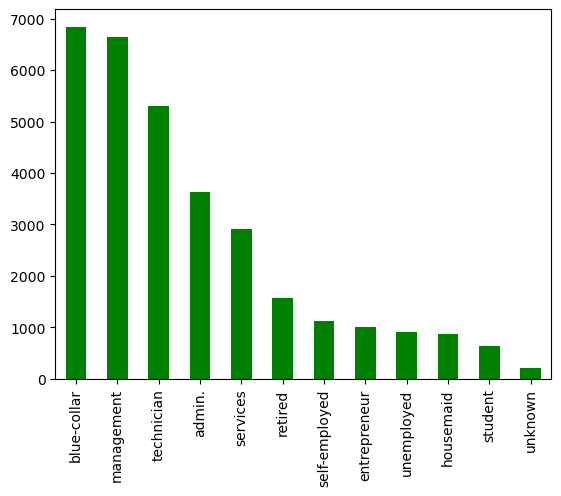

In [16]:
train_data['job'].value_counts().plot.bar(color='green')

<function matplotlib.pyplot.show(close=None, block=None)>

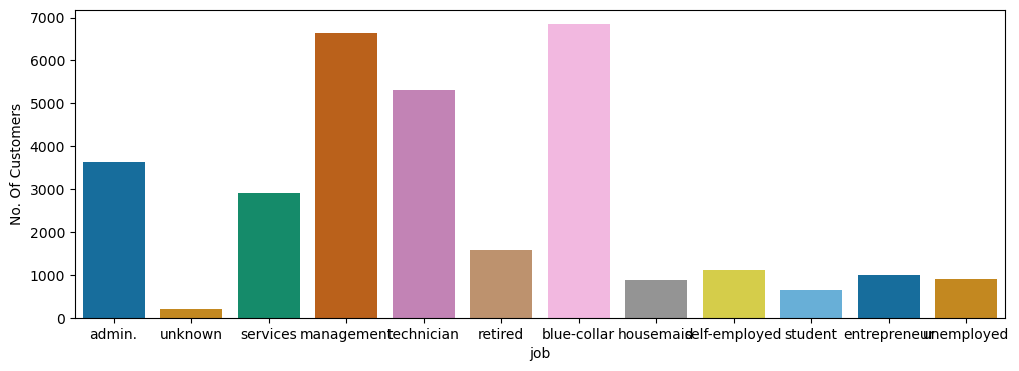

In [17]:
#shows the no.of customers vs Client's Term Deposit Subscription Status
plt.subplots(figsize=(12,4))
sns.countplot(x ='job', data = train_data, palette = 'colorblind')
plt.ylabel('No. Of Customers')
plt.show

In [18]:
train_data['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

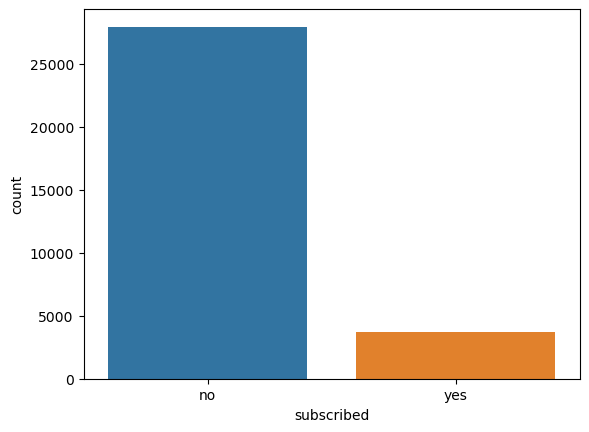

In [19]:
sns.countplot(data=train_data, x='subscribed')

<Axes: xlabel='job,subscribed'>

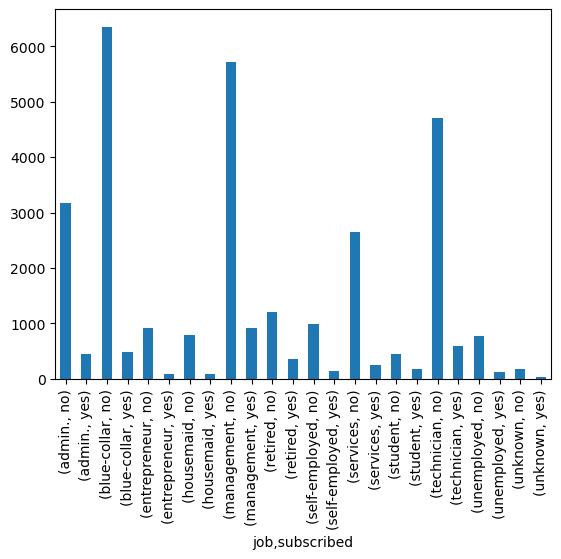

In [20]:
train_data.groupby('job')['subscribed'].value_counts().plot.bar()

<Axes: xlabel='default,subscribed'>

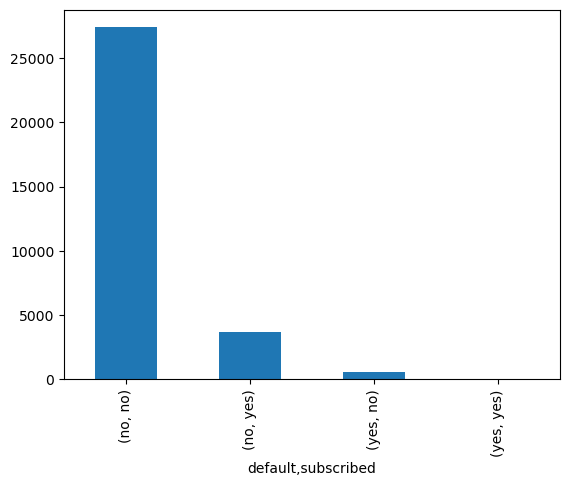

In [21]:
train_data.groupby('default')['subscribed'].value_counts().plot.bar()

In [22]:
train_data['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

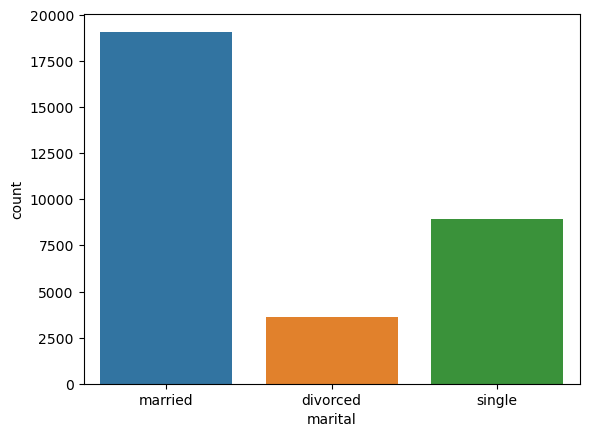

In [23]:
sns.countplot(data=train_data, x='marital');

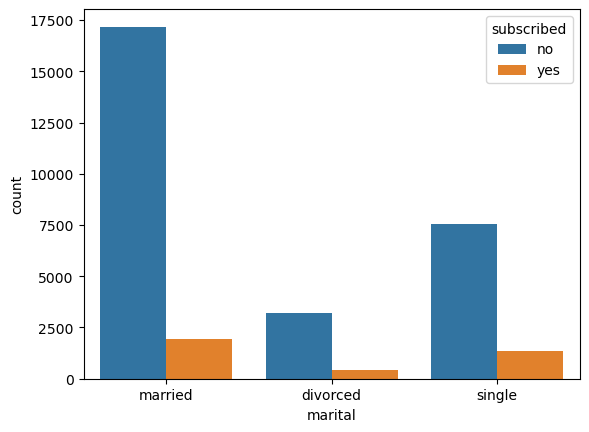

In [24]:
sns.countplot(data=train_data, x='marital', hue='subscribed');

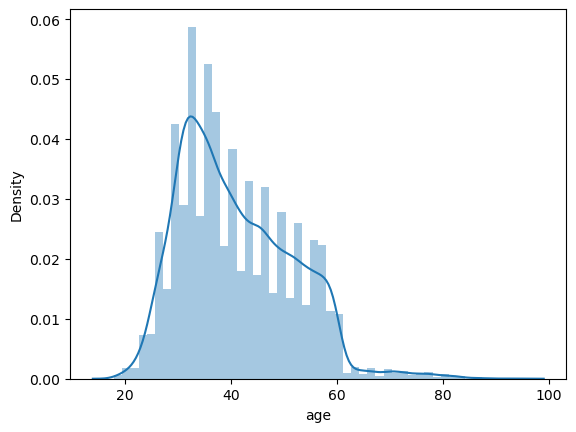

In [25]:
sns.distplot(train_data['age']);

In [26]:
#job vs subscribed
print(pd.crosstab(train_data['job'],train_data['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [27]:
job = pd.crosstab(train_data['job'],train_data['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

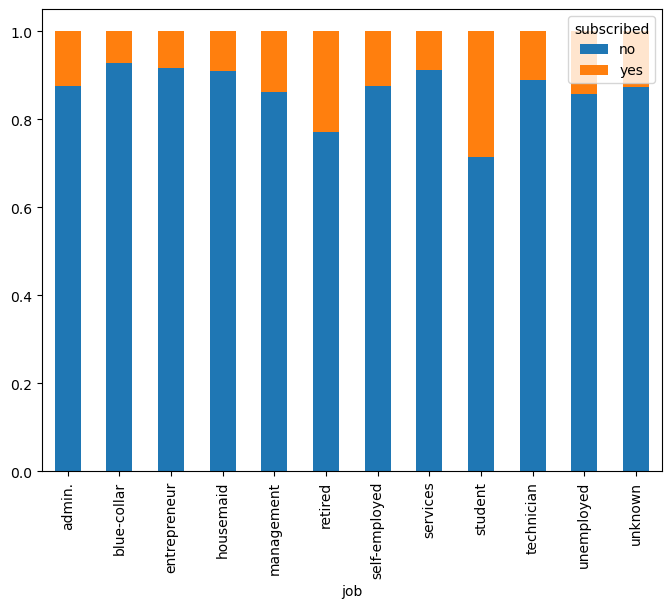

In [28]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

In [29]:
#Correlation matrix
tc = train_data.corr()
tc

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


<Axes: >

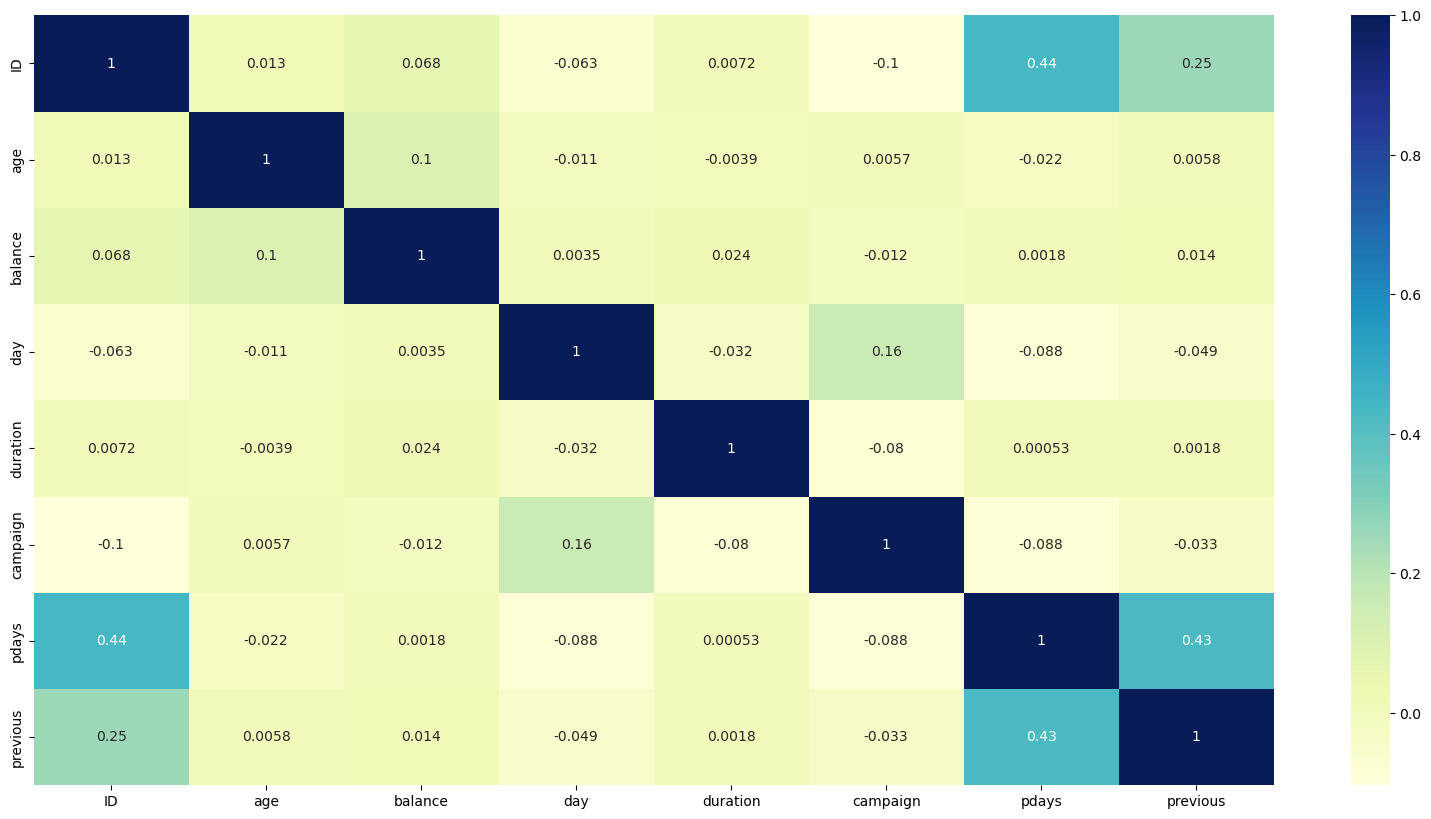

In [30]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

In [31]:
# Converting the target variables into 0s and 1s
train_data['subscribed'].replace('no', 0,inplace=True)
train_data['subscribed'].replace('yes', 1,inplace=True)

## Model Building

In [32]:
target = train_data['subscribed']
train_data = train_data.drop('subscribed', axis=1)

In [33]:
#generating dummy values on the train dataset
train_data = pd.get_dummies(train_data)
train_data.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
#spliting data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data, target, test_size=0.2, random_state=0)

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

LogisticRegression()

In [36]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

In [37]:
from sklearn.metrics import accuracy_score
#Calculating the accuracy score
accuracy = accuracy_score(y_val, pred)
print(accuracy)

0.885308056872038


#### confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val, pred)

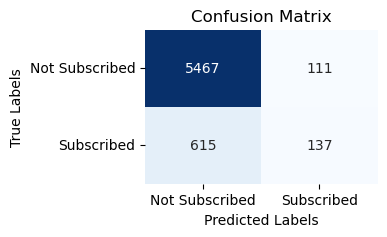

In [39]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val, pred)
# Plot confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### prediction on test dataset

In [40]:
test_data = pd.get_dummies(test_data)
test_data.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [41]:
test_pred = lreg.predict(test_data)
test_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=5, random_state=0)

In [43]:
#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [44]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [45]:
#Calculating the accuracy
accuracy_score(y_val,predict)

0.9055292259083728

#### Let's now make the prediction on test dataset

In [46]:
test_data = pd.get_dummies(test_data)
test_data.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [47]:
test_pred = clf.predict(test_data)
test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

##### we will save these predictions into a csv file.

In [48]:
sub = pd.DataFrame()

In [49]:
sub['ID'] = test_data['ID']
sub['subscribed'] = test_pred

In [50]:
sub['subscribed']

0        0
1        1
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

- Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [51]:
sub['subscribed'].replace(0,'no',inplace=True)
sub['subscribed'].replace(1,'yes',inplace=True)

In [52]:
sub['subscribed']

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [53]:
sub.to_csv('Bank Marketing', header=True, index=False)